In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [79]:
dataset=(r"C:\Users\AradhanaSingh\Desktop\IRIS.csv")
iris_data = pd.read_csv(dataset, encoding='latin1')

In [80]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [82]:
#number of rows
len(iris_data)

150

In [83]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [84]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [85]:
iris_data.shape

(150, 5)

In [86]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [87]:
iris_data["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


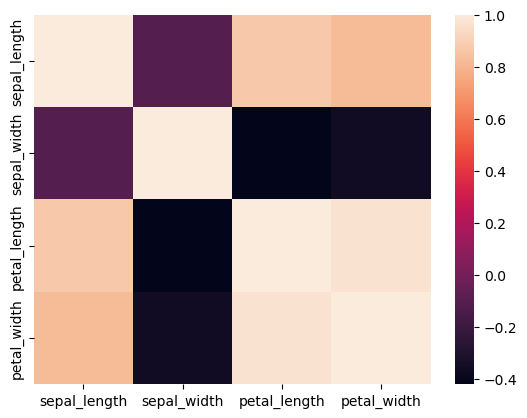

In [88]:
# check for multicollinearity 
corr = iris_data.drop(columns='species').corr()
print(corr)
sns.heatmap(corr);

In [90]:
# Handling the Categorical Column Species

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
iris_data["species"] = label_encoder.fit_transform(iris_data['species'])

In [91]:
iris_data["species"].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [92]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [93]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


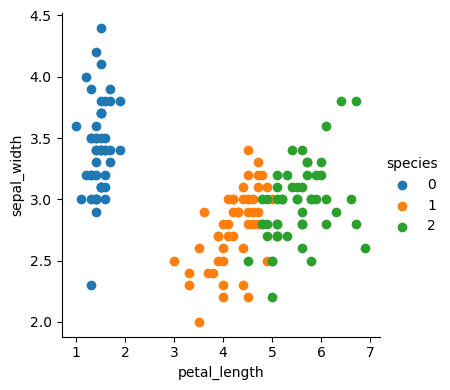

In [94]:
#Scatter plot of different species
sns.FacetGrid(iris_data, hue ='species', height = 4).map(plt.scatter,"petal_length","sepal_width").add_legend()
plt.show()

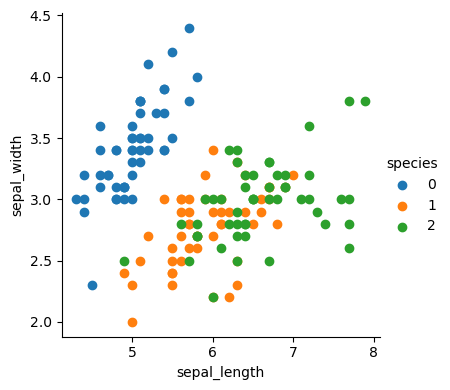

In [95]:
sns.FacetGrid(iris_data, hue ='species', height = 4).map(plt.scatter,"sepal_length","sepal_width").add_legend()
plt.show()

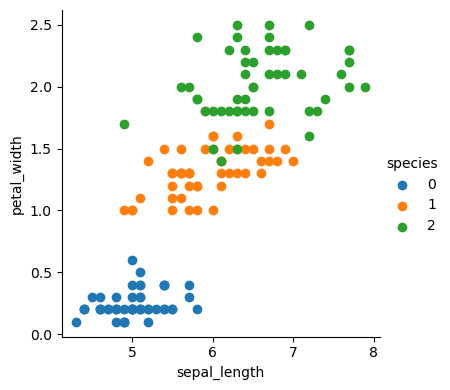

In [96]:
sns.FacetGrid(iris_data, hue ='species', height = 4).map(plt.scatter,"sepal_length","petal_width").add_legend()
plt.show()

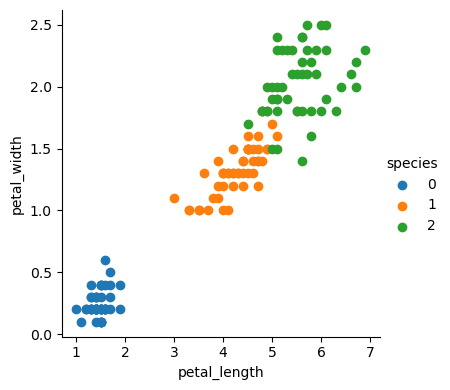

In [97]:
sns.FacetGrid(iris_data, hue ='species', height = 4).map(plt.scatter,"petal_length","petal_width").add_legend()
plt.show()

<Axes: >

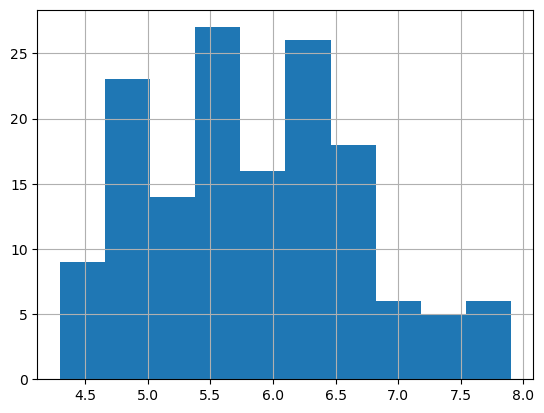

In [109]:
# Histograms
iris_data['sepal_length'].hist()

<Axes: >

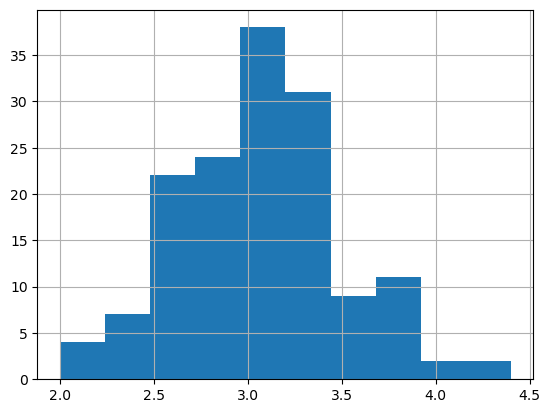

In [110]:
iris_data['sepal_width'].hist()

<Axes: >

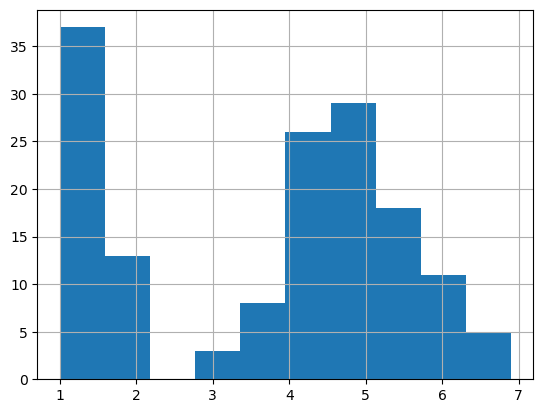

In [111]:
iris_data['petal_length'].hist()

<Axes: >

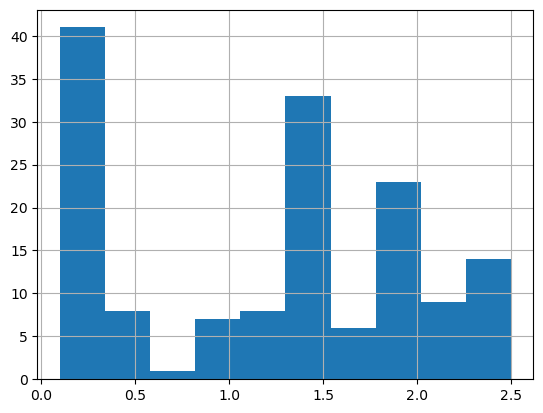

In [113]:
iris_data['petal_width'].hist()

In [98]:
x=iris_data.iloc[:,:-1].values
y=iris_data.iloc[:,-1].values

In [99]:
x.shape

(150, 4)

In [100]:
y.shape

(150,)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
# K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix is : ")
print(cm)
acc2=accuracy_score(y_test, y_pred)
print(acc2)

The Confusion Matrix is : 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
0.9736842105263158


In [123]:
# predictions on the test data
y_pred = classifier.predict(X_test)


In [124]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])